In [1]:
#International Debt Statistic Analysis
#Siddhant Chamoli

import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced visualizations

# Load dataset from Excel file
file_path = "D:\Resume Projects\Analysing International Debt\debt_statistic.xlsx"  # Replace with the actual file path
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
data.head()


,Country Name,Country Code,Counterpart-Area Name,Counterpart-Area Code,Series Name,Series Code,1970,1971,1972,1973,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,Afghanistan,AFG,World,WLD,Average grace period on new external debt comm...,DT.GPA.DPPG,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,World,WLD,Average grace period on new external debt comm...,DT.GPA.OFFT,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,World,WLD,Average grace period on new external debt comm...,DT.GPA.PRVT,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,World,WLD,Average grant element on new external debt com...,DT.GRE.DPPG,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,World,WLD,Average grant element on new external debt com...,DT.GRE.OFFT,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Understanding the Dataset Format & Structure

# Display basic information about the dataset
data.info()

# Check the summary statistics
data.describe()

# Check for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77797 entries, 0 to 77796
Data columns (total 67 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country Name           77794 non-null  object 
 1   Country Code           77792 non-null  object 
 2   Counterpart-Area Name  77792 non-null  object 
 3   Counterpart-Area Code  77792 non-null  object 
 4   Series Name            77792 non-null  object 
 5   Series Code            77792 non-null  object 
 6   1970                   32656 non-null  float64
 7   1971                   33615 non-null  float64
 8   1972                   34330 non-null  float64
 9   1973                   35099 non-null  float64
 10  1974                   35647 non-null  float64
 11  1975                   36422 non-null  float64
 12  1976                   36859 non-null  float64
 13  1977                   37809 non-null  float64
 14  1978                   38581 non-null  float64
 15  19

Country Name                 3
Country Code                 5
Counterpart-Area Name        5
Counterpart-Area Code        5
Series Name                  5
                         ...  
2026                     65266
2027                     65421
2028                     65669
2029                     65898
2030                     66088
Length: 67, dtype: int64

In [5]:
#Cleaning the DataSet

# Dropping columns that are not necessary
data_cleaned = data.drop(['Unnecessary Column 1', 'Unnecessary Column 2'], axis=1)  # Example

# Filling missing values (if applicable)
data_cleaned.fillna(0, inplace=True)

# Remove duplicates (if any)
data_cleaned.drop_duplicates(inplace=True)


KeyError: "['Unnecessary Column 1', 'Unnecessary Column 2'] not found in axis"

In [6]:
#Cleaning the Dataset

# Drop Counterpart-Area related columns since we focus on countries
data_cleaned = data.drop(['Counterpart-Area Name', 'Counterpart-Area Code'], axis=1)

# Fill missing values with 0 for the debt-related data
data_cleaned.fillna(0, inplace=True)

# Check for duplicates and remove them if necessary
data_cleaned.drop_duplicates(inplace=True)

# Display cleaned data
data_cleaned.head()


,Country Name,Country Code,Series Name,Series Code,1970,1971,1972,1973,1974,1975,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.DPPG,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.OFFT,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,Average grace period on new external debt comm...,DT.GPA.PRVT,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,Average grant element on new external debt com...,DT.GRE.DPPG,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,Average grant element on new external debt com...,DT.GRE.OFFT,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#Exploring Key Metrics

# Select a metric for external debt from the dataset (e.g., external debt stock)
external_debt_data = data_cleaned[data_cleaned['Series Name'] == 'External debt stocks, total (DOD, current US$)']

# Group the data by year and calculate the average debt
years = [str(year) for year in range(1970, 2031)]  # Columns representing years
average_debt_by_year = external_debt_data[years].mean()

# Plot the average debt over time
plt.figure(figsize=(10, 6))
plt.plot(average_debt_by_year.index, average_debt_by_year.values, marker='o')
plt.title('Average External Debt Over Time (1970-2030)')
plt.xlabel('Year')
plt.ylabel('Average External Debt (USD)')
plt.grid(True)
plt.show()


KeyError: "None of [Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',\n       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',\n       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',\n       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',\n       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',\n       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',\n       '2024', '2025', '2026', '2027', '2028', '2029', '2030'],\n      dtype='object')] are in the [columns]"

In [8]:
#Country Level Analysis

# Filter the data for the year 2020 and external debt metric
external_debt_2020 = external_debt_data[['Country Name', '2020']].sort_values(by='2020', ascending=False)

# Plot the top 10 countries with the highest debt in 2020
top_10_countries_2020 = external_debt_2020.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries_2020['2020'], y=top_10_countries_2020['Country Name'])
plt.title('Top 10 Countries by External Debt in 2020')
plt.xlabel('External Debt (USD)')
plt.ylabel('Country')
plt.show()


KeyError: "['2020'] not in index"

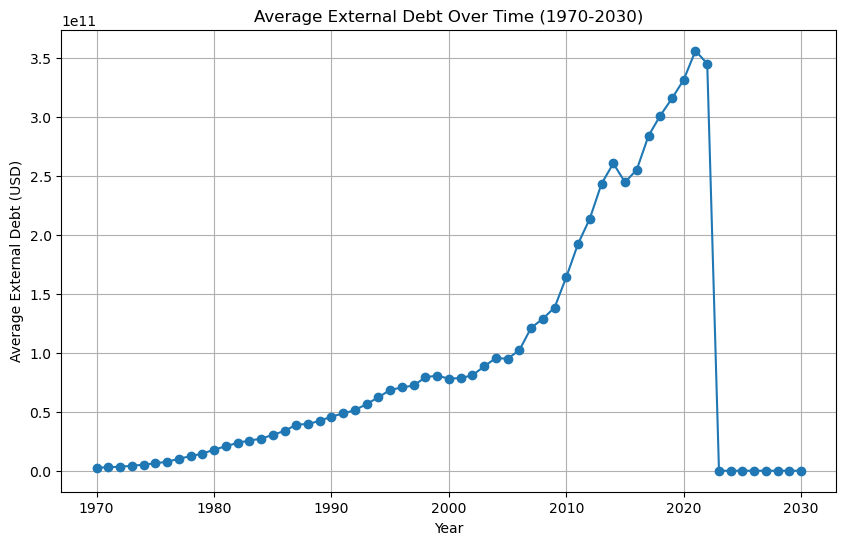

In [9]:
#Exploring Key Metrics

# Select a metric for external debt from the dataset (e.g., external debt stock)
external_debt_data = data_cleaned[data_cleaned['Series Name'] == 'External debt stocks, total (DOD, current US$)']

# Group the data by year and calculate the average debt
years = list(range(1970, 2031))  # Columns representing years as integers
average_debt_by_year = external_debt_data[years].mean()

# Plot the average debt over time
plt.figure(figsize=(10, 6))
plt.plot(average_debt_by_year.index, average_debt_by_year.values, marker='o')
plt.title('Average External Debt Over Time (1970-2030)')
plt.xlabel('Year')
plt.ylabel('Average External Debt (USD)')
plt.grid(True)
plt.show()


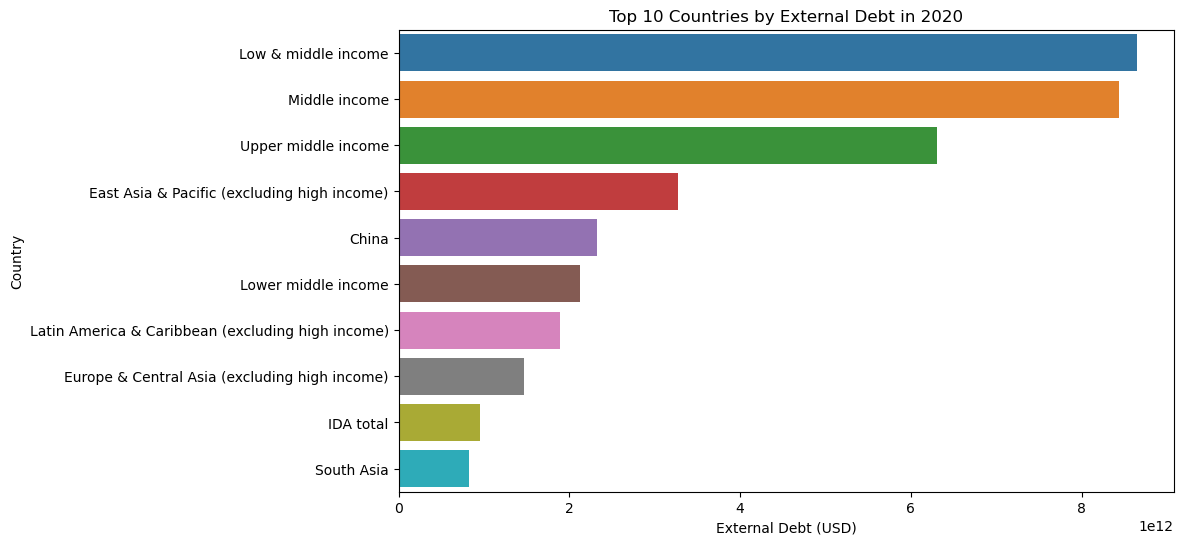

In [10]:
# Country Level Analysis

# Filter the data for the year 2020 and external debt metric
external_debt_2020 = external_debt_data[['Country Name', 2020]].sort_values(by=2020, ascending=False)

# Plot the top 10 countries with the highest debt in 2020
top_10_countries_2020 = external_debt_2020.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries_2020[2020], y=top_10_countries_2020['Country Name'])
plt.title('Top 10 Countries by External Debt in 2020')
plt.xlabel('External Debt (USD)')
plt.ylabel('Country')
plt.show()


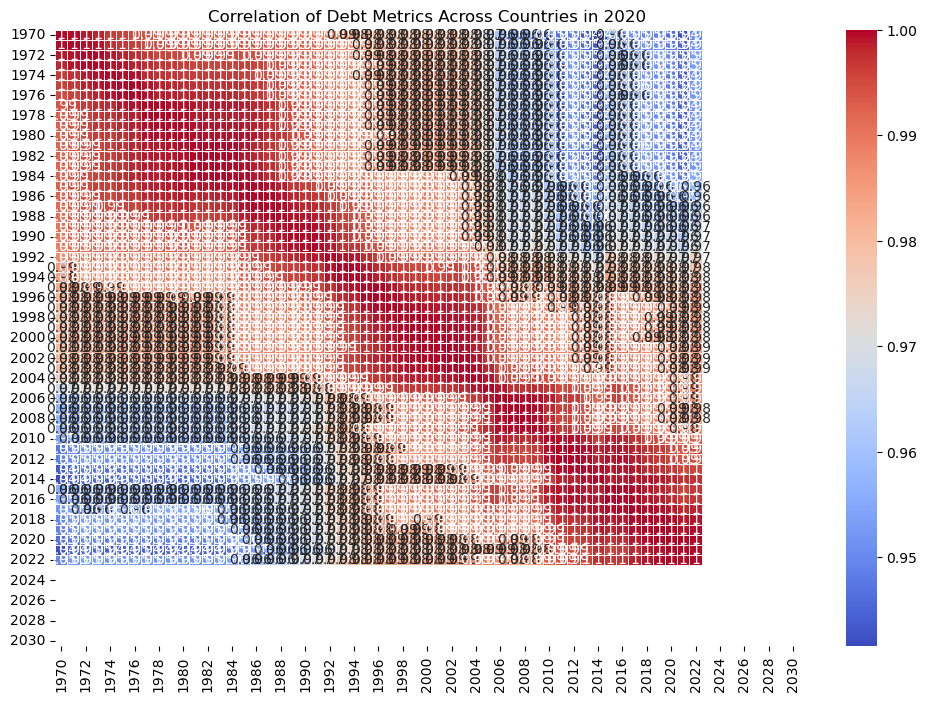

In [12]:
#Correlation Between Debt Metrics

# Compute the correlation matrix for the year 2020
correlation_matrix_2020 = external_debt_data[years].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_2020, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Debt Metrics Across Countries in 2020')
plt.show()


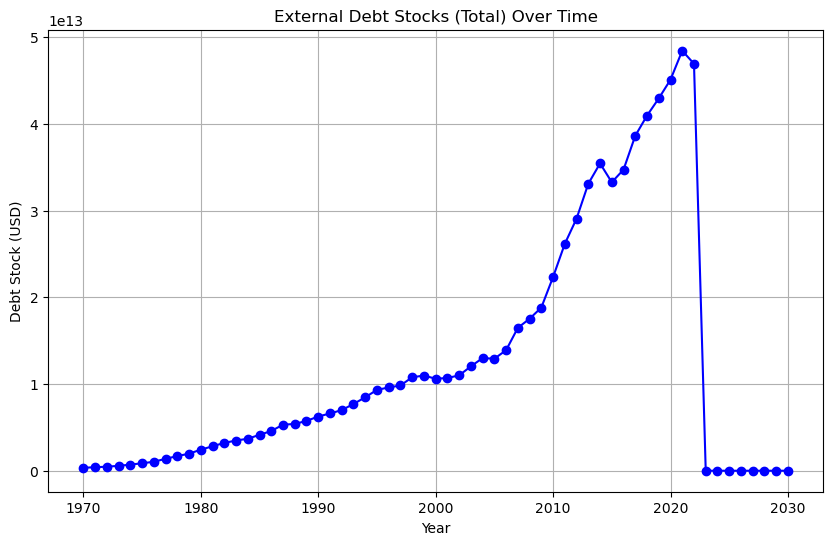

In [13]:
# Filter data for External Debt Stocks (Total)
external_debt_stocks = data_cleaned[data_cleaned['Series Name'] == 'External debt stocks, total (DOD, current US$)']

# Group by year and sum the debt across countries
debt_stocks_by_year = external_debt_stocks[years].sum()

# Plot the debt stocks over time
plt.figure(figsize=(10, 6))
plt.plot(debt_stocks_by_year.index, debt_stocks_by_year.values, marker='o', color='b')
plt.title('External Debt Stocks (Total) Over Time')
plt.xlabel('Year')
plt.ylabel('Debt Stock (USD)')
plt.grid(True)
plt.show()


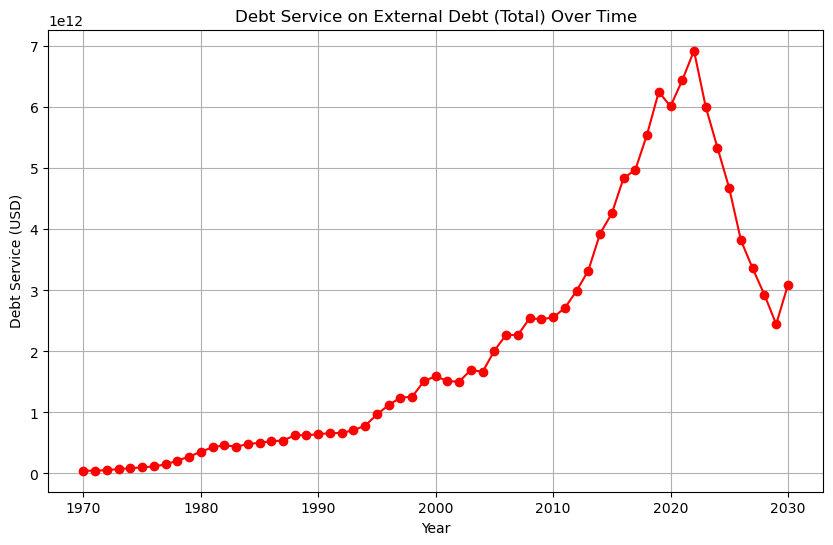

In [14]:
# Filter data for Debt Service on External Debt (Total)
debt_service_total = data_cleaned[data_cleaned['Series Name'] == 'Debt service on external debt, total (TDS, current US$)']

# Group by year and sum the debt service
debt_service_by_year = debt_service_total[years].sum()

# Plot the debt service trend over time
plt.figure(figsize=(10, 6))
plt.plot(debt_service_by_year.index, debt_service_by_year.values, marker='o', color='r')
plt.title('Debt Service on External Debt (Total) Over Time')
plt.xlabel('Year')
plt.ylabel('Debt Service (USD)')
plt.grid(True)
plt.show()


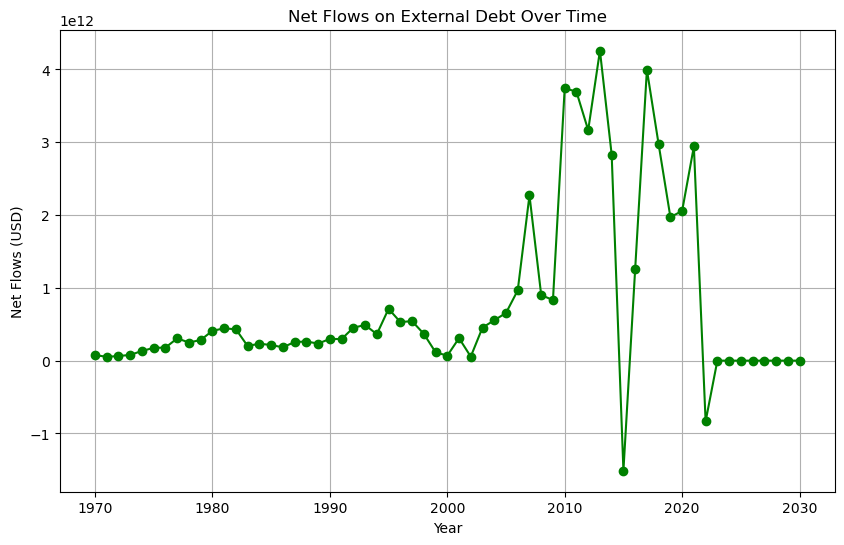

In [15]:
# Filter data for Net Flows on External Debt
net_flows_debt = data_cleaned[data_cleaned['Series Name'] == 'Net flows on external debt, total (NFL, current US$)']

# Group by year and sum the net flows
net_flows_by_year = net_flows_debt[years].sum()

# Plot the net flows trend
plt.figure(figsize=(10, 6))
plt.plot(net_flows_by_year.index, net_flows_by_year.values, marker='o', color='g')
plt.title('Net Flows on External Debt Over Time')
plt.xlabel('Year')
plt.ylabel('Net Flows (USD)')
plt.grid(True)
plt.show()


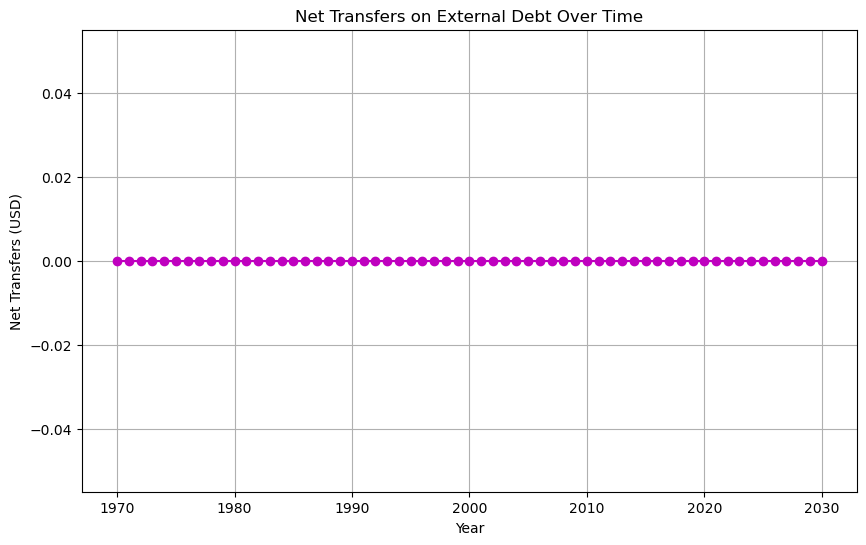

In [16]:
# Filter data for Net Transfers on External Debt
net_transfers_debt = data_cleaned[data_cleaned['Series Name'] == 'Net transfers on external debt, total (NT, current US$)']

# Group by year and sum the net transfers
net_transfers_by_year = net_transfers_debt[years].sum()

# Plot the net transfers trend
plt.figure(figsize=(10, 6))
plt.plot(net_transfers_by_year.index, net_transfers_by_year.values, marker='o', color='m')
plt.title('Net Transfers on External Debt Over Time')
plt.xlabel('Year')
plt.ylabel('Net Transfers (USD)')
plt.grid(True)
plt.show()


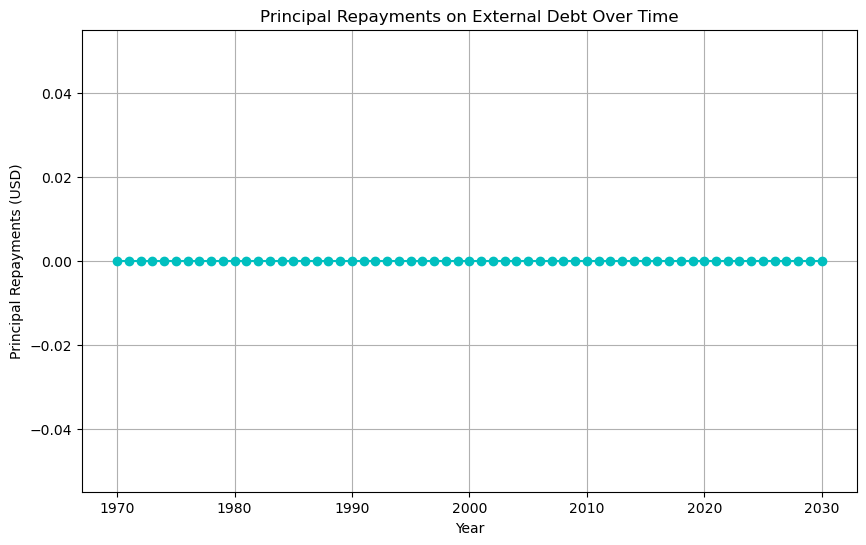

In [17]:
# Filter data for Principal Repayments on External Debt
principal_repayments_debt = data_cleaned[data_cleaned['Series Name'] == 'Principal repayments on external debt, total (AMT, current US$)']

# Group by year and sum the principal repayments
principal_repayments_by_year = principal_repayments_debt[years].sum()

# Plot the principal repayments trend
plt.figure(figsize=(10, 6))
plt.plot(principal_repayments_by_year.index, principal_repayments_by_year.values, marker='o', color='c')
plt.title('Principal Repayments on External Debt Over Time')
plt.xlabel('Year')
plt.ylabel('Principal Repayments (USD)')
plt.grid(True)
plt.show()


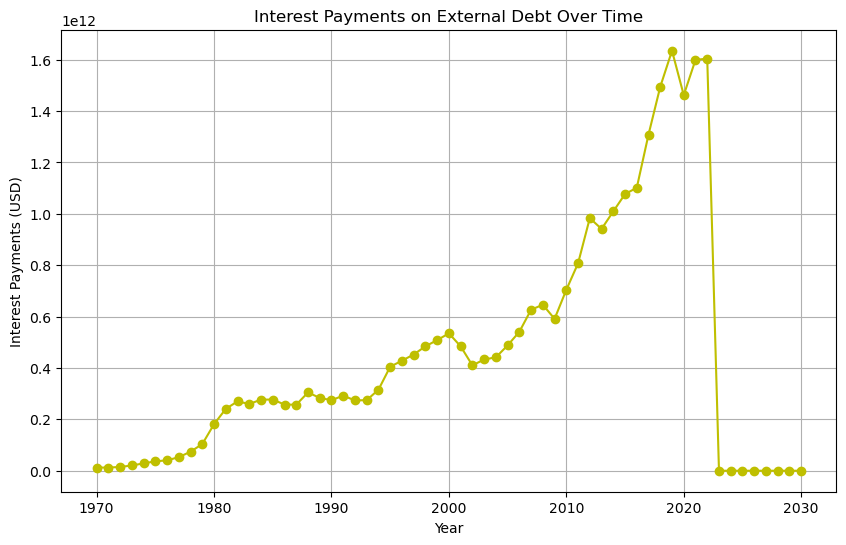

In [18]:
# Filter data for Interest Payments on External Debt
interest_payments_debt = data_cleaned[data_cleaned['Series Name'] == 'Interest payments on external debt, total (INT, current US$)']

# Group by year and sum the interest payments
interest_payments_by_year = interest_payments_debt[years].sum()

# Plot the interest payments trend
plt.figure(figsize=(10, 6))
plt.plot(interest_payments_by_year.index, interest_payments_by_year.values, marker='o', color='y')
plt.title('Interest Payments on External Debt Over Time')
plt.xlabel('Year')
plt.ylabel('Interest Payments (USD)')
plt.grid(True)
plt.show()


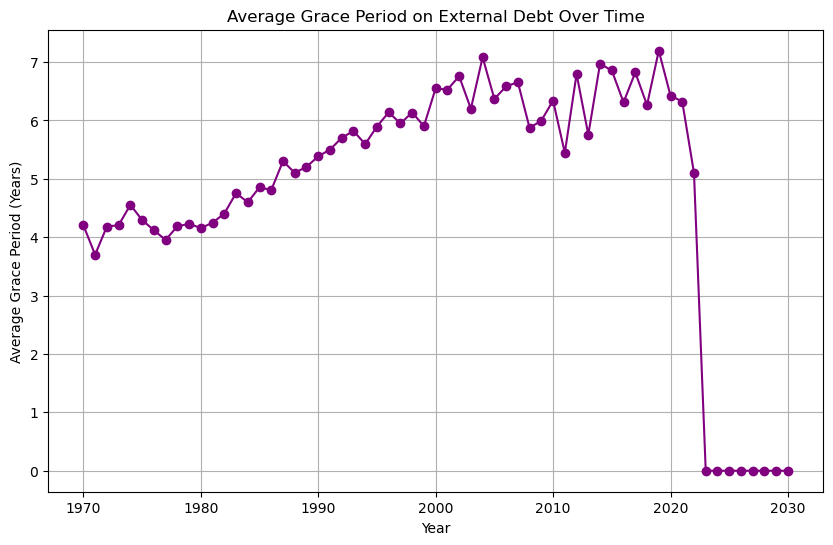

In [19]:
# Filter data for Average Grace Period on External Debt
grace_period_debt = data_cleaned[data_cleaned['Series Name'] == 'Average grace period on new external debt commitments (years)']

# Group by year and take the average grace period
grace_period_by_year = grace_period_debt[years].mean()

# Plot the grace period trend
plt.figure(figsize=(10, 6))
plt.plot(grace_period_by_year.index, grace_period_by_year.values, marker='o', color='purple')
plt.title('Average Grace Period on External Debt Over Time')
plt.xlabel('Year')
plt.ylabel('Average Grace Period (Years)')
plt.grid(True)
plt.show()


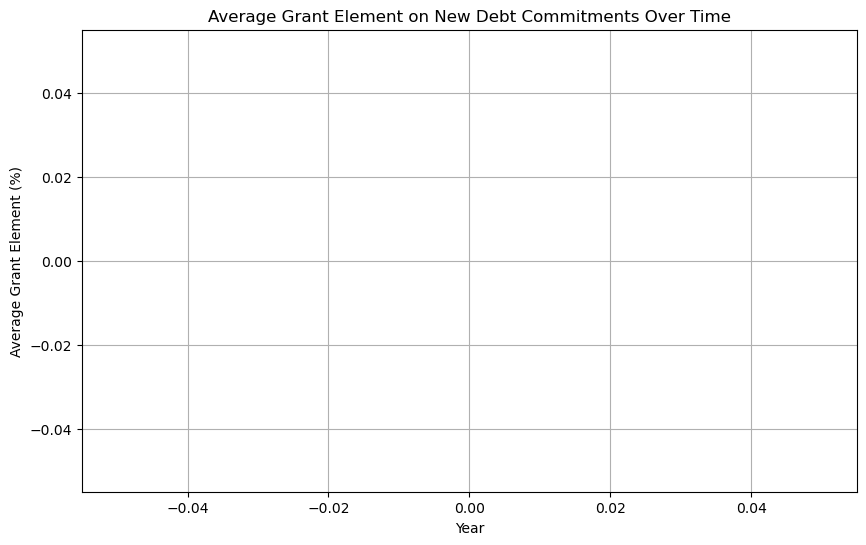

In [20]:
# Filter data for Average Grant Element
grant_element_debt = data_cleaned[data_cleaned['Series Name'] == 'Average grant element on new external debt commitments (GRT, %)']

# Group by year and take the average grant element
grant_element_by_year = grant_element_debt[years].mean()

# Plot the grant element trend
plt.figure(figsize=(10, 6))
plt.plot(grant_element_by_year.index, grant_element_by_year.values, marker='o', color='orange')
plt.title('Average Grant Element on New Debt Commitments Over Time')
plt.xlabel('Year')
plt.ylabel('Average Grant Element (%)')
plt.grid(True)
plt.show()


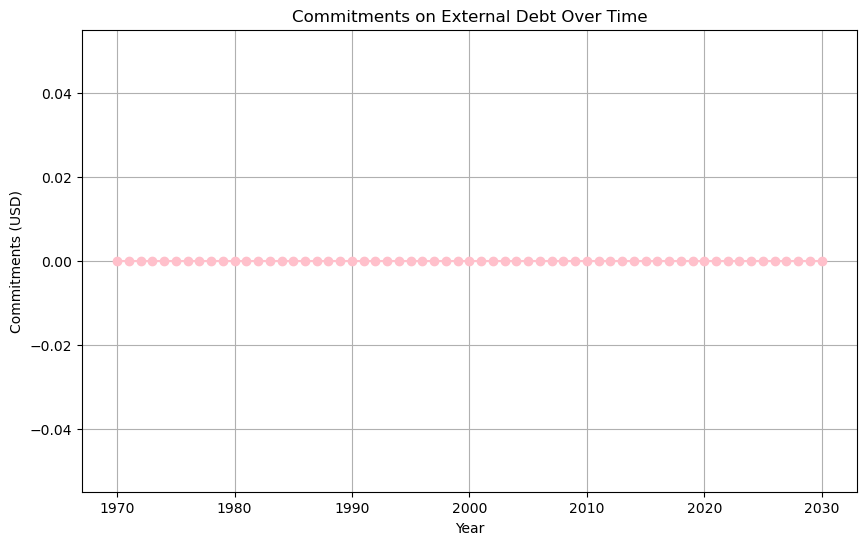

In [21]:
# Filter data for Commitments on External Debt
commitments_debt = data_cleaned[data_cleaned['Series Name'] == 'Commitments on external debt, total (COM, current US$)']

# Group by year and sum the commitments
commitments_by_year = commitments_debt[years].sum()

# Plot the commitments trend
plt.figure(figsize=(10, 6))
plt.plot(commitments_by_year.index, commitments_by_year.values, marker='o', color='pink')
plt.title('Commitments on External Debt Over Time')
plt.xlabel('Year')
plt.ylabel('Commitments (USD)')
plt.grid(True)
plt.show()


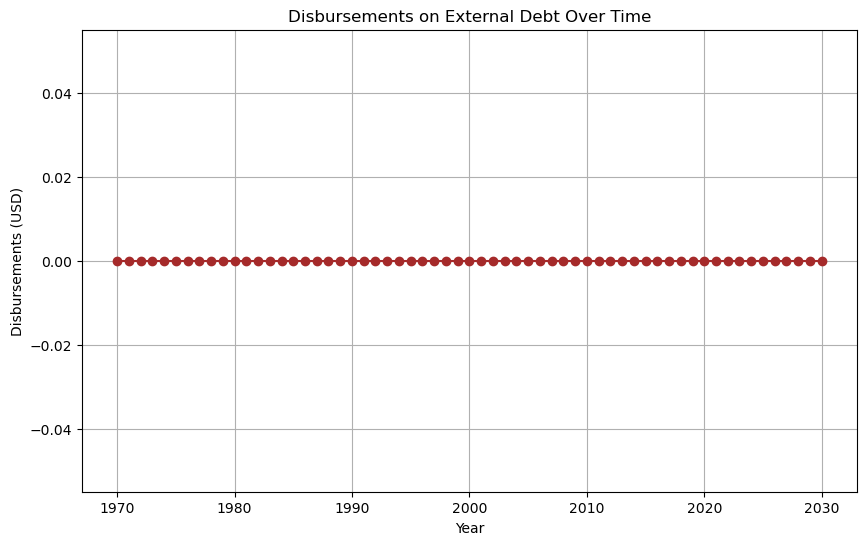

In [22]:
# Filter data for Disbursements on External Debt
disbursements_debt = data_cleaned[data_cleaned['Series Name'] == 'Disbursements on external debt, total (DIS, current US$)']

# Group by year and sum the disbursements
disbursements_by_year = disbursements_debt[years].sum()

# Plot the disbursements trend
plt.figure(figsize=(10, 6))
plt.plot(disbursements_by_year.index, disbursements_by_year.values, marker='o', color='brown')
plt.title('Disbursements on External Debt Over Time')
plt.xlabel('Year')
plt.ylabel('Disbursements (USD)')
plt.grid(True)
plt.show()


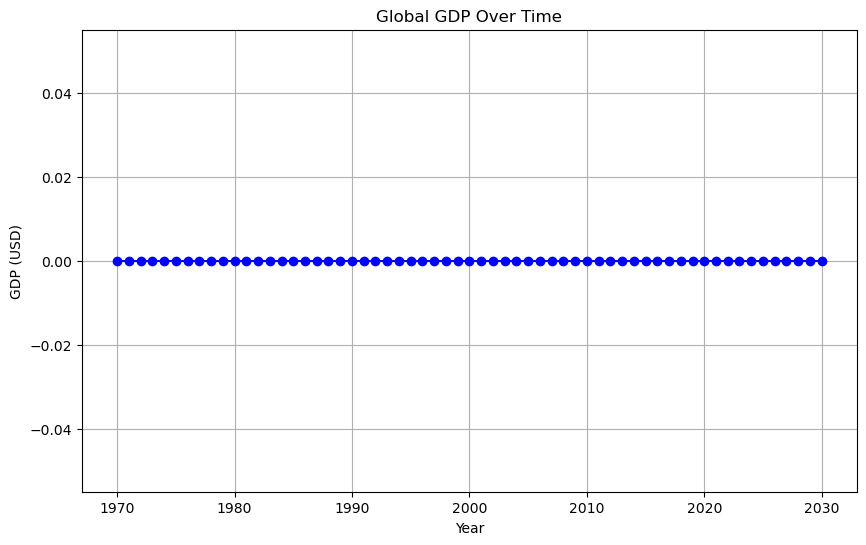

In [23]:
# Filter data for GDP
gdp_data = data_cleaned[data_cleaned['Series Name'] == 'GDP (current US$)']

# Group by year and sum the GDP
gdp_by_year = gdp_data[years].sum()

# Plot GDP over time
plt.figure(figsize=(10, 6))
plt.plot(gdp_by_year.index, gdp_by_year.values, marker='o', color='b')
plt.title('Global GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP (USD)')
plt.grid(True)
plt.show()


1970    0.0
1971    0.0
1972    0.0
1973    0.0
1974    0.0
       ... 
2026    0.0
2027    0.0
2028    0.0
2029    0.0
2030    0.0
Length: 61, dtype: float64


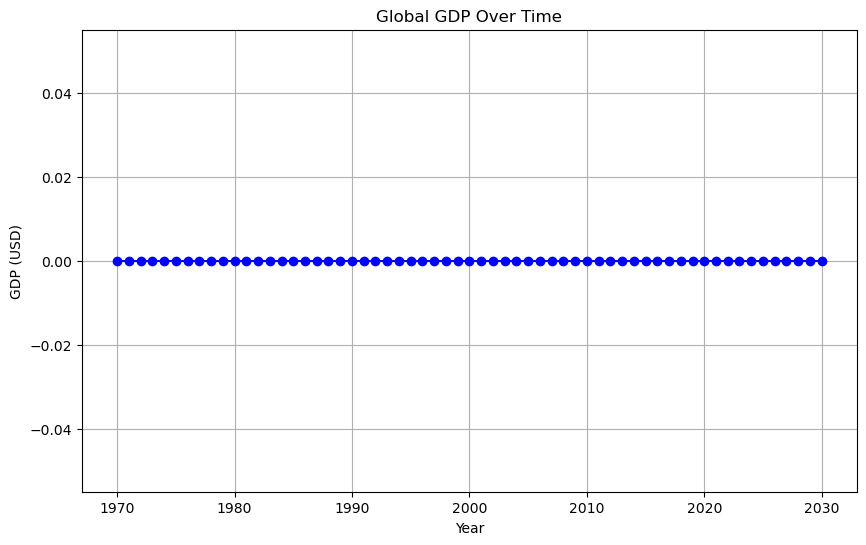

In [24]:
# Filter data for GDP (current US$)
gdp_data = data_cleaned[data_cleaned['Series Name'] == 'GDP (current US$)']

# Group by year and sum the GDP globally
gdp_by_year = gdp_data[years].sum()

# Check for large constant values or anomalies in the data
print(gdp_by_year)

# Plot GDP over time
plt.figure(figsize=(10, 6))
plt.plot(gdp_by_year.index, gdp_by_year.values, marker='o', color='b')
plt.title('Global GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP (USD)')
plt.grid(True)
plt.show()


In [25]:
# Example: Analyze GDP for a specific country (e.g., United States)
country_gdp = gdp_data[gdp_data['Country Name'] == 'United States']

# Plot GDP over time for this country
plt.figure(figsize=(10, 6))
plt.plot(years, country_gdp[years].values[0], marker='o', color='g')
plt.title('GDP of United States Over Time')
plt.xlabel('Year')
plt.ylabel('GDP (USD)')
plt.grid(True)
plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 1000x600 with 0 Axes>

In [26]:
# Example: Replace 'United States' with the correct country name from the previous step
country_gdp = gdp_data[gdp_data['Country Name'] == 'United States']

# Plot GDP over time for this country (adjust based on the correct country name)
plt.figure(figsize=(10, 6))
plt.plot(years, country_gdp[years].values[0], marker='o', color='g')
plt.title('GDP of United States Over Time')
plt.xlabel('Year')
plt.ylabel('GDP (USD)')
plt.grid(True)
plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 1000x600 with 0 Axes>

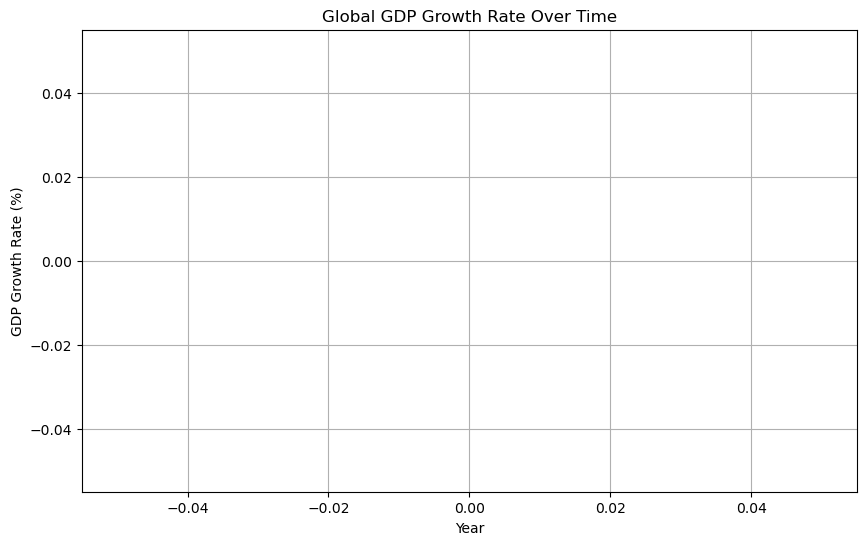

In [27]:
# Filter data for GDP (current US$)
gdp_data = data_cleaned[data_cleaned['Series Name'] == 'GDP (current US$)']

# Group by year and sum the GDP globally
gdp_by_year = gdp_data[years].sum()

# Calculate the GDP growth rate as the percentage change year-over-year
gdp_growth_rate = gdp_by_year.pct_change() * 100

# Plot the GDP growth rate over time
plt.figure(figsize=(10, 6))
plt.plot(gdp_growth_rate.index, gdp_growth_rate.values, marker='o', color='r')
plt.title('Global GDP Growth Rate Over Time')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.grid(True)
plt.show()


In [28]:
# Filter data for GDP of a specific country, e.g., United States
country_gdp = gdp_data[gdp_data['Country Name'] == 'United States']

# Calculate the GDP growth rate for the specific country
gdp_growth_rate_country = country_gdp[years].pct_change(axis='columns') * 100

# Plot the GDP growth rate for the country over time
plt.figure(figsize=(10, 6))
plt.plot(years, gdp_growth_rate_country.values[0], marker='o', color='b')
plt.title('GDP Growth Rate of United States Over Time')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.grid(True)
plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 1000x600 with 0 Axes>

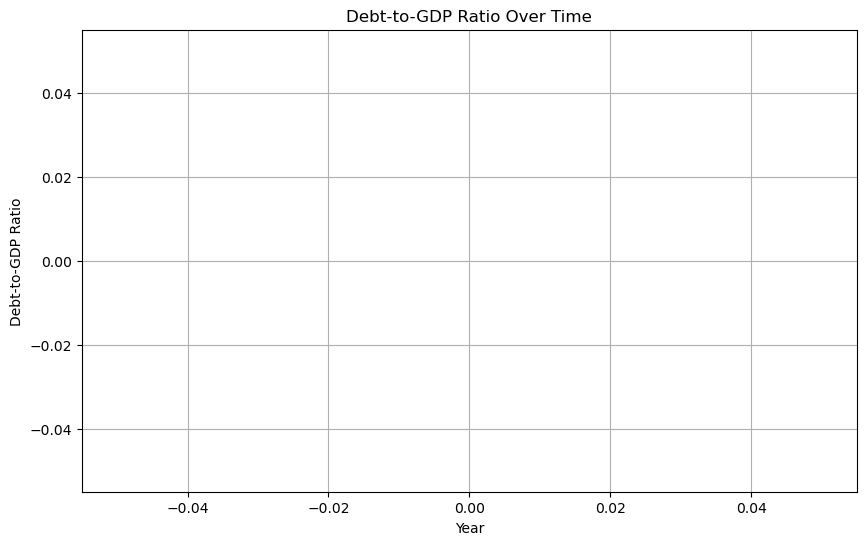

In [29]:
# Assume we have already filtered 'external_debt_stocks' and 'gdp_data'
debt_to_gdp_ratio = external_debt_stocks[years].sum() / gdp_data[years].sum()

# Plot Debt-to-GDP ratio over time
plt.figure(figsize=(10, 6))
plt.plot(debt_to_gdp_ratio.index, debt_to_gdp_ratio.values, marker='o', color='r')
plt.title('Debt-to-GDP Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Debt-to-GDP Ratio')
plt.grid(True)
plt.show()


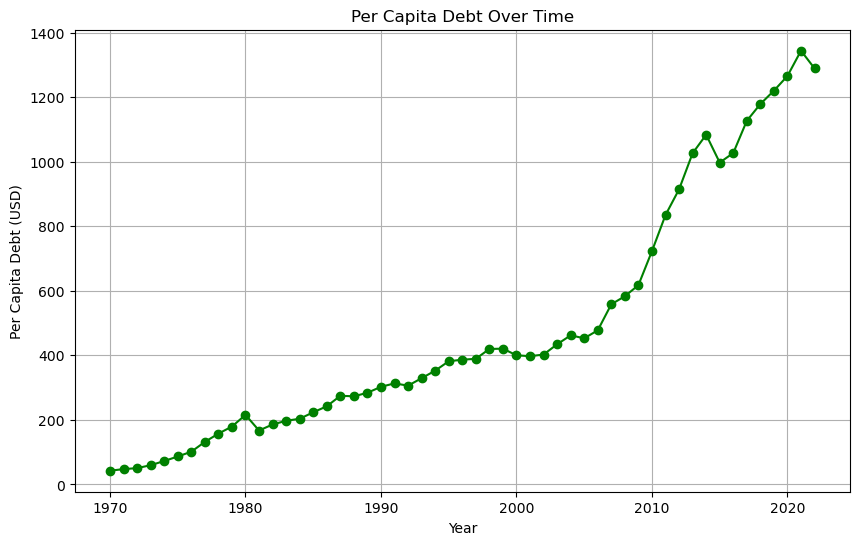

In [30]:
# Assume 'Population' data is available in the dataset under the 'Population' series
population_data = data_cleaned[data_cleaned['Series Name'] == 'Population, total']

# Calculate Per Capita Debt (Total External Debt / Total Population)
per_capita_debt = external_debt_stocks[years].sum() / population_data[years].sum()

# Plot per capita debt over time
plt.figure(figsize=(10, 6))
plt.plot(per_capita_debt.index, per_capita_debt.values, marker='o', color='g')
plt.title('Per Capita Debt Over Time')
plt.xlabel('Year')
plt.ylabel('Per Capita Debt (USD)')
plt.grid(True)
plt.show()


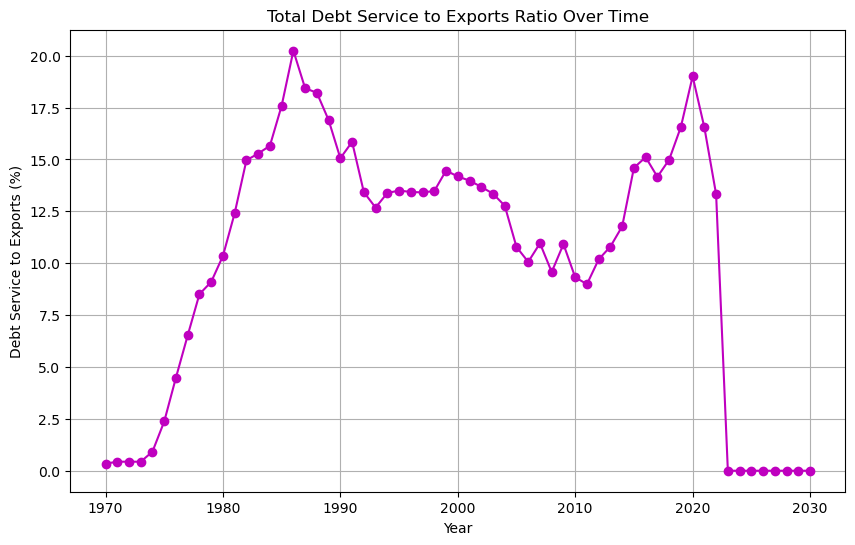

In [31]:
# Filter data for Total Debt Service to Exports Ratio
debt_service_exports_ratio = data_cleaned[data_cleaned['Series Name'] == 'Total debt service (% of exports of goods, services and primary income)']

# Plot the trend for the ratio
debt_service_exports_by_year = debt_service_exports_ratio[years].mean()

plt.figure(figsize=(10, 6))
plt.plot(debt_service_exports_by_year.index, debt_service_exports_by_year.values, marker='o', color='m')
plt.title('Total Debt Service to Exports Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Debt Service to Exports (%)')
plt.grid(True)
plt.show()


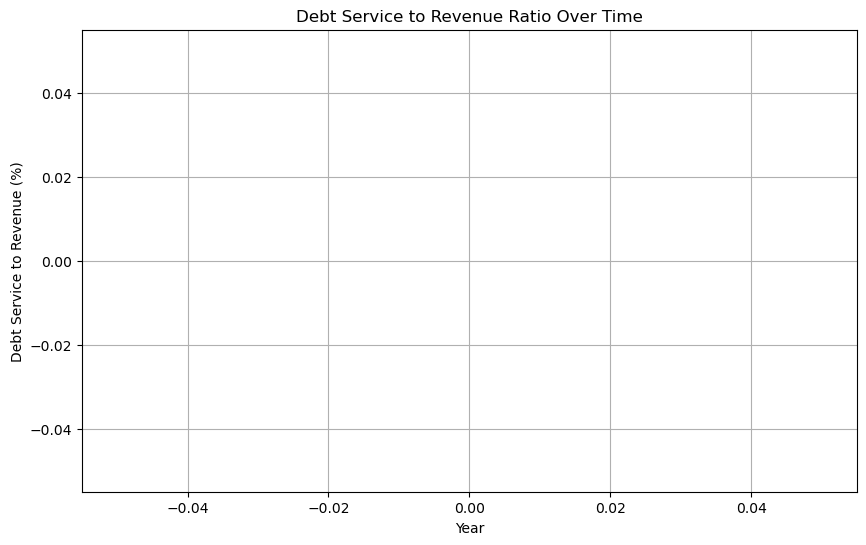

In [32]:
# Filter data for Debt Service to Revenue Ratio
debt_service_revenue = data_cleaned[data_cleaned['Series Name'] == 'Debt service (% of revenue)']

# Plot Debt Service to Revenue ratio
debt_service_revenue_by_year = debt_service_revenue[years].mean()

plt.figure(figsize=(10, 6))
plt.plot(debt_service_revenue_by_year.index, debt_service_revenue_by_year.values, marker='o', color='orange')
plt.title('Debt Service to Revenue Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Debt Service to Revenue (%)')
plt.grid(True)
plt.show()


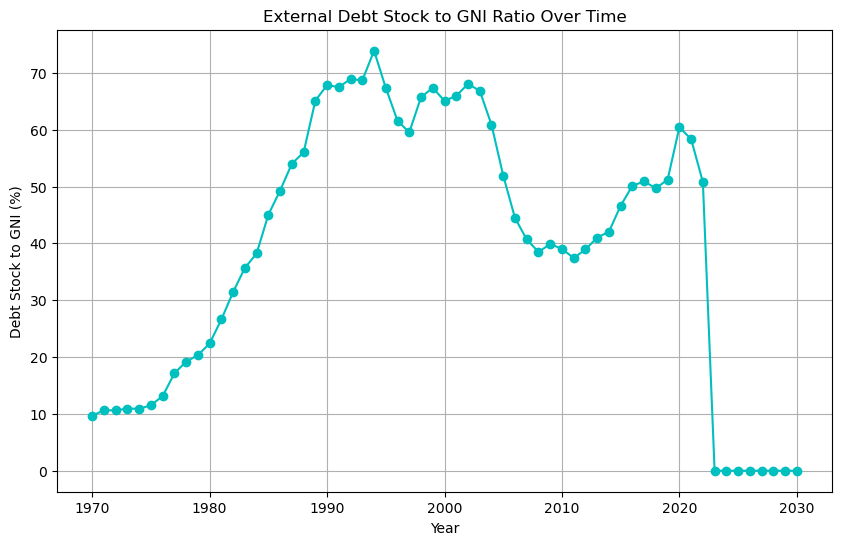

In [33]:
# Filter data for External Debt Stock to GNI Ratio
external_debt_gni_ratio = data_cleaned[data_cleaned['Series Name'] == 'External debt stocks (% of GNI)']

# Plot the External Debt to GNI ratio trend
external_debt_gni_by_year = external_debt_gni_ratio[years].mean()

plt.figure(figsize=(10, 6))
plt.plot(external_debt_gni_by_year.index, external_debt_gni_by_year.values, marker='o', color='c')
plt.title('External Debt Stock to GNI Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Debt Stock to GNI (%)')
plt.grid(True)
plt.show()


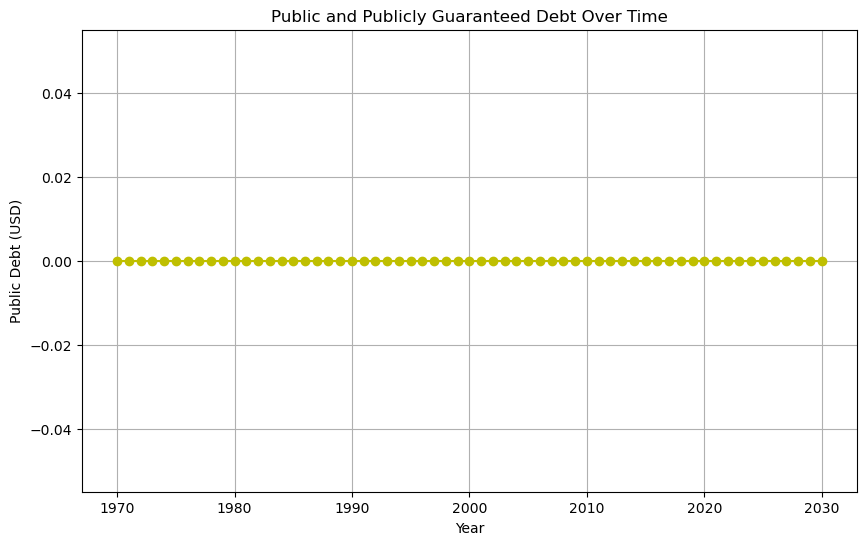

In [34]:
# Filter data for Public Debt
public_debt_data = data_cleaned[data_cleaned['Series Name'] == 'Public and publicly guaranteed debt service (current US$)']

# Plot Public Debt trend
public_debt_by_year = public_debt_data[years].sum()

plt.figure(figsize=(10, 6))
plt.plot(public_debt_by_year.index, public_debt_by_year.values, marker='o', color='y')
plt.title('Public and Publicly Guaranteed Debt Over Time')
plt.xlabel('Year')
plt.ylabel('Public Debt (USD)')
plt.grid(True)
plt.show()


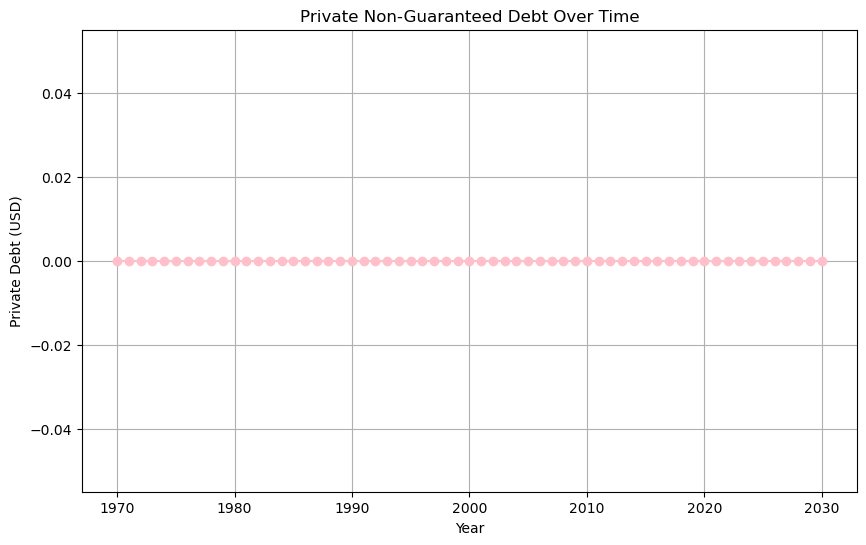

In [35]:
# Filter data for Private Non-Guaranteed Debt
private_debt_data = data_cleaned[data_cleaned['Series Name'] == 'Private nonguaranteed debt service (current US$)']

# Plot Private Debt trend
private_debt_by_year = private_debt_data[years].sum()

plt.figure(figsize=(10, 6))
plt.plot(private_debt_by_year.index, private_debt_by_year.values, marker='o', color='pink')
plt.title('Private Non-Guaranteed Debt Over Time')
plt.xlabel('Year')
plt.ylabel('Private Debt (USD)')
plt.grid(True)
plt.show()


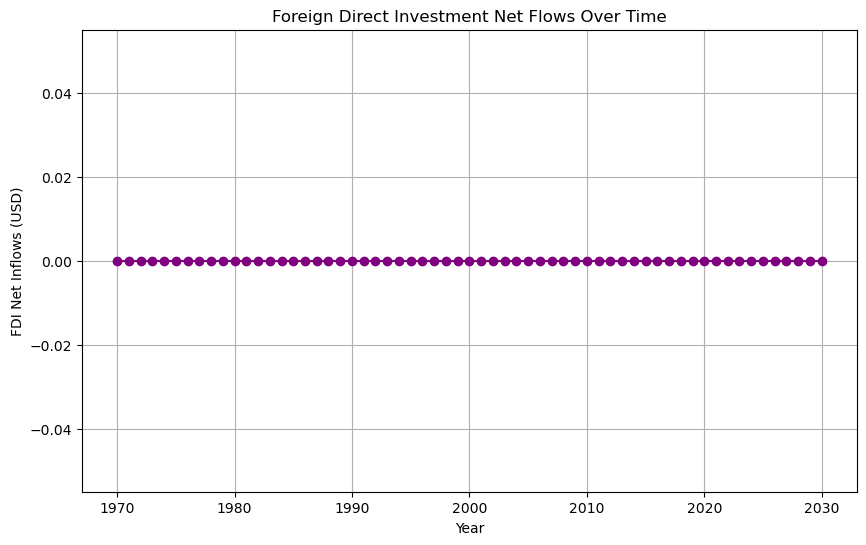

In [36]:
# Filter data for FDI
fdi_data = data_cleaned[data_cleaned['Series Name'] == 'Foreign direct investment, net inflows (BoP, current US$)']

# Plot FDI trend
fdi_by_year = fdi_data[years].sum()

plt.figure(figsize=(10, 6))
plt.plot(fdi_by_year.index, fdi_by_year.values, marker='o', color='purple')
plt.title('Foreign Direct Investment Net Flows Over Time')
plt.xlabel('Year')
plt.ylabel('FDI Net Inflows (USD)')
plt.grid(True)
plt.show()


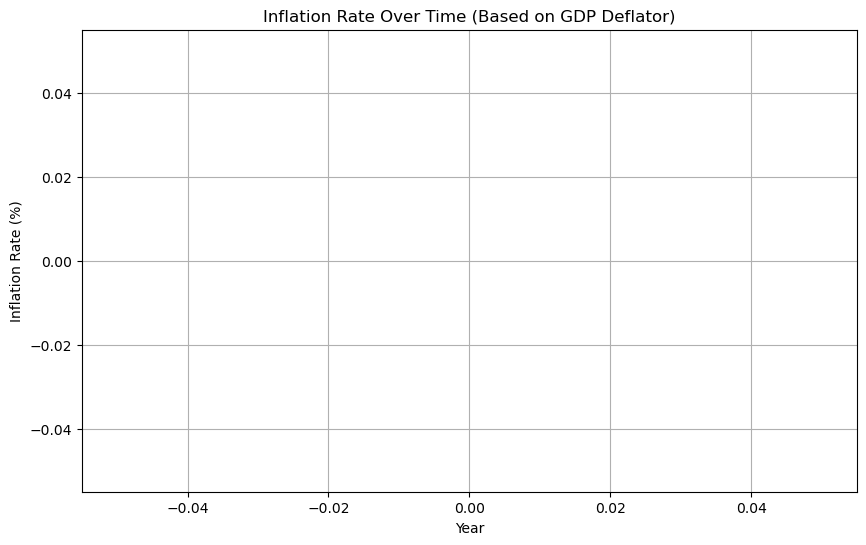

In [38]:
# Filter data for Inflation (GDP deflator)
inflation_data = data_cleaned[data_cleaned['Series Name'] == 'Inflation, GDP deflator (annual %)']

# Extract the values for the years
years = list(range(1970, 2031))

# Get the inflation values for each year
inflation_by_year = inflation_data[years].mean()

# Calculate the inflation rate as the percentage change year-over-year
inflation_rate = inflation_by_year.pct_change() * 100

# Plot the inflation rate over time
plt.figure(figsize=(10, 6))
plt.plot(inflation_rate.index, inflation_rate.values, marker='o', color='g')
plt.title('Inflation Rate Over Time (Based on GDP Deflator)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.show()
